Generación 1:
Mejor solución:
x (decimal) = 0.4782122734538019
x (binario) = 000001100001111100
f(x, 0) = 0.22868697848185382


Generación 2:
Mejor solución:
x (decimal) = 0.08491548505968116
x (binario) = 000000010001011001
f(x, 0) = 0.007210639602920935


Generación 3:
Mejor solución:
x (decimal) = 0.08491548505968116
x (binario) = 000000010001011001
f(x, 0) = 0.007210639602920935


Generación 4:
Mejor solución:
x (decimal) = 0.06111168331788375
x (binario) = 000000001100100001
f(x, 0) = 0.0037346378379453106


Generación 5:
Mejor solución:
x (decimal) = 0.0
x (binario) = 000000000000000000
f(x, 0) = 0.0


Generación 6:
Mejor solución:
x (decimal) = 0.0
x (binario) = 000000000000000000
f(x, 0) = 0.0


Generación 7:
Mejor solución:
x (decimal) = 0.0
x (binario) = 000000000000000000
f(x, 0) = 0.0


Generación 8:
Mejor solución:
x (decimal) = 0.0
x (binario) = 000000000000000000
f(x, 0) = 0.0


Generación 9:
Mejor solución:
x (decimal) = 0.0
x (binario) = 000000000000000000
f(x, 0) = 0.

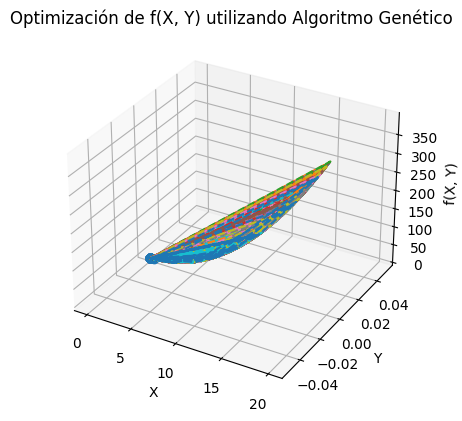

Mejor solución encontrada:
x (decimal) = 0.0
x (binario) = 000000000000000000
f(x, 0) = 0.0


In [34]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros del algoritmo genético
num_generaciones = 100
tamano_poblacion = 50
tasa_mutacion = 0.1
tasa_cruce = 0.7
longitud_cromosoma = 18
minimo_x = 0
maximo_x = 20

# Función de aptitud
def funcion_aptitud(x, y):
    return x**2 + 3*y

# Función para generar un individuo aleatorio
def generar_individuo():
    cromosoma = [random.randint(0, 1) for _ in range(longitud_cromosoma)]
    x = minimo_x + int("".join(map(str, cromosoma)), 2) * (maximo_x - minimo_x) / (2**longitud_cromosoma - 1)
    return x, cromosoma

# Función de mutación
def mutar(cromosoma):
    for i in range(len(cromosoma)):
        if random.random() < tasa_mutacion:
            cromosoma[i] = 1 - cromosoma[i]
    return cromosoma

# Función de cruzamiento
def cruzar(padre1, padre2):
    punto_cruce = random.randint(1, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
    return hijo1, hijo2

# Función para convertir un cromosoma en binario a un valor decimal
def binario_a_decimal(cromosoma):
    return minimo_x + int("".join(map(str, cromosoma)), 2) * (maximo_x - minimo_x) / (2**longitud_cromosoma - 1)

# Inicialización de la población
poblacion = [generar_individuo() for _ in range(tamano_poblacion)]

# Listas para almacenar los resultados
generaciones = []
valores_x = []
valores_y = []
valores_z = []

# Registro de la curva de la función
curva_x = []
curva_z = []

# Ciclo principal del algoritmo genético
for generacion in range(num_generaciones):
    poblacion.sort(key=lambda x: funcion_aptitud(x[0], 0))
    mejores = poblacion[:10]
    
    nueva_generacion = mejores
    
    while len(nueva_generacion) < tamano_poblacion:
        if random.random() < tasa_cruce:
            padre1, padre2 = random.choices(mejores, k=2)
            hijo1, hijo2 = cruzar(padre1[1], padre2[1])
            hijo1 = mutar(hijo1)
            hijo2 = mutar(hijo2)
            nueva_generacion.append((binario_a_decimal(hijo1), hijo1))
            nueva_generacion.append((binario_a_decimal(hijo2), hijo2))
        else:
            individuo = generar_individuo()
            nueva_generacion.append(individuo)
    
    poblacion = nueva_generacion

    # Registro de resultados de cada generación
    mejor_solucion = min(poblacion, key=lambda x: funcion_aptitud(x[0], 0))
    generaciones.append(generacion + 1)
    valores_x.append(mejor_solucion[0])
    valores_y.append(0)  # Mantenemos y constante en 0
    valores_z.append(funcion_aptitud(mejor_solucion[0], 0))

    # Registro de la curva de la función en esta generación
    curva_x_generacion = [individuo[0] for individuo in poblacion]
    curva_z_generacion = [funcion_aptitud(individuo[0], 0) for individuo in poblacion]
    curva_x.append(curva_x_generacion)
    curva_z.append(curva_z_generacion)

    # Impresión de resultados de la generación actual
    print(f"Generación {generacion + 1}:")
    print("Mejor solución:")
    print("x (decimal) =", mejor_solucion[0])
    print("x (binario) =", ''.join(map(str, mejor_solucion[1])))
    print("f(x, 0) =", funcion_aptitud(mejor_solucion[0], 0))
    print("\n")

# Creación de la gráfica 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar la evolución de la función f(X, Y) en la misma gráfica 3D
ax.plot(valores_x, valores_y, valores_z, marker='o', linestyle='-', markersize=6, label='Evolución de f(X, Y)')

# Dibujar la curva de la función en cada generación
for i in range(len(curva_x)):
    ax.plot(curva_x[i], [0] * len(curva_x[i]), curva_z[i], linestyle='--')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

# Título de la gráfica
plt.title('Optimización de f(X, Y) utilizando Algoritmo Genético')

# Mostrar la gráfica
plt.show()

# Mejor solución encontrada
mejor_solucion = min(poblacion, key=lambda x: funcion_aptitud(x[0], 0))
print("Mejor solución encontrada:")
print("x (decimal) =", mejor_solucion[0])
print("x (binario) =", ''.join(map(str, mejor_solucion[1])))
print("f(x, 0) =", funcion_aptitud(mejor_solucion[0], 0))